In algorithmic approach, we should use forward selection in this problem for efficiency. 
Because p is very big => we cannot use subset selection and p is not greater than n => we cannot use backward selection.

In Shrinkage Method, we want to select relevant features to obtain true target values.

In mathematical approach, we should use LASSO.
Because we only need to find 2 features among 10 features. In other words, we should eliminate 8 features among 10. In Ridge and Elastic-Net, weights of the features approaches to zero, but they cannot be zero rapidly. If we want to eliminate some features, weights should be rapidly zero and this method is the LASSO.

In Elastic-Net (mathematical approach), we can eliminate 8 features among 10 with only lambda=1. But in this case, ridge term coefficient (1-lambda) will be equal to zero and it will equal to the LASSO. 


In the algorithmic approaches, we calculate feature performances and select best performance. Except for the features of the best performance, the weights of the rest are zero.

In mathematical approaches, we calculate all weights of the features, then we choose the best performance.


# Load data and visualize

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv("data.csv")

In [3]:
data

,x,y
0,0.725708,8.041778
1,-0.390810,-10.459451
2,-1.769738,-25.287686
3,1.923968,-9.023523
4,0.028524,10.035387
...,...,...
995,-1.236013,-17.197747
996,0.248180,9.876812
997,0.782871,7.407568
998,-0.319772,-11.087141


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
X = pd.DataFrame(data.x)
y = data.y

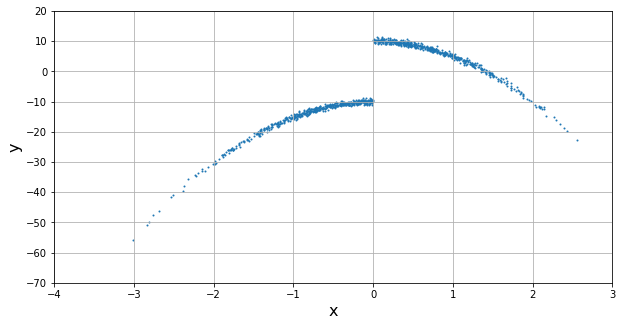

In [6]:
# visualize data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s = 1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis([-4, 3, -70, 20])
plt.grid(True)
plt.show()

In [7]:
# xArray contains possible features
xArray = np.c_[np.ones((len(X),1)), X, X**2, X**3, X**4, np.abs(X), np.sign(X), np.sin(X), np.cos(X), np.exp(X)]

In [8]:
xArray.shape

(1000, 10)

In [9]:
xArray

array([[ 1.        ,  0.72570771,  0.52665168, ...,  0.663665  ,
         0.74802993,  2.06619284],
       [ 1.        , -0.39080996,  0.15273242, ..., -0.38093743,
         0.92460082,  0.67650871],
       [ 1.        , -1.76973797,  3.13197249, ..., -0.98027629,
        -0.19763196,  0.17037763],
       ...,
       [ 1.        ,  0.78287146,  0.61288772, ...,  0.70531787,
         0.70889117,  2.18774527],
       [ 1.        , -0.31977181,  0.10225401, ..., -0.31434995,
         0.94930717,  0.72631475],
       [ 1.        ,  0.67046389,  0.44952183, ...,  0.62134953,
         0.78353351,  1.95514408]])

In [10]:
X_b = np.c_[X, X**2, X**3, X**4, np.abs(X), np.sign(X), np.sin(X), np.cos(X), np.exp(X)]
X_b

array([[ 0.72570771,  0.52665168,  0.38219518, ...,  0.663665  ,
         0.74802993,  2.06619284],
       [-0.39080996,  0.15273242, -0.05968935, ..., -0.38093743,
         0.92460082,  0.67650871],
       [-1.76973797,  3.13197249, -5.54277065, ..., -0.98027629,
        -0.19763196,  0.17037763],
       ...,
       [ 0.78287146,  0.61288772,  0.4798123 , ...,  0.70531787,
         0.70889117,  2.18774527],
       [-0.31977181,  0.10225401, -0.03269795, ..., -0.31434995,
         0.94930717,  0.72631475],
       [ 0.67046389,  0.44952183,  0.30138815, ...,  0.62134953,
         0.78353351,  1.95514408]])

In [11]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('[beta0, beta1, beta2] = ', w_estimate)

[beta0, beta1, beta2] =  [-4.15924343e-01 -4.83295158e+00  8.03059342e-02  1.62479744e-03
 -1.50203079e-01  1.00570534e+01  5.13368879e-01  1.55782297e-01
 -9.15294369e-02]


In [12]:
y_hat = X_b.dot(w_estimate)
y_hat

array([ 7.40018877e+00, -1.08095562e+01, -2.57022725e+01, -8.52688213e+00,
        1.01131571e+01,  1.00968133e+01, -1.44439449e+01, -1.05339898e+01,
       -1.11544029e+01, -1.00588443e+01,  1.01146038e+01, -1.35425521e+01,
       -1.02042188e+01, -1.19585038e+01,  9.51813413e+00,  6.48146835e+00,
       -1.16895743e+01,  2.30454458e+00,  1.00298084e+01, -1.23901449e+01,
        1.01180482e+01, -2.57098419e+01, -1.72391271e+01, -2.03005977e+01,
       -3.55627463e+00, -1.15194804e+01, -1.40648944e+01,  1.00647144e+01,
       -1.95006366e+01, -1.00710750e+01, -2.26865845e+00,  9.67064128e+00,
        9.37902617e+00, -2.72106858e+01, -1.25101002e+01, -1.47450552e+01,
       -1.22955985e+01,  9.70073110e+00, -1.28766791e+01,  2.10759435e+00,
        9.12521209e-01,  9.68971685e+00, -7.77041667e+00,  7.74699024e+00,
        8.66988586e+00, -1.04484473e+00, -1.04312919e+01, -1.71838170e+01,
        3.56815975e+00,  4.68675238e+00, -1.42221359e+01,  6.09059641e+00,
        9.45037561e+00,  

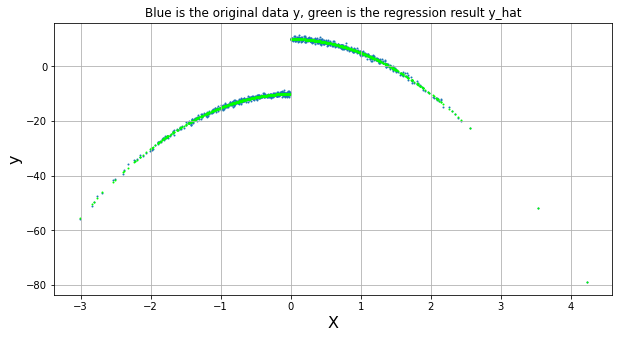

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s = 1)
plt.scatter(X, y_hat, s = 1, color='lime')
plt.title('Blue is the original data y, green is the regression result y_hat')
plt.xlabel('X', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.show()


# Forward Selection

#### I know that my forward selection algorithm doesnt working well. But I understand its working principle.

In [14]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import functools 

y = y.astype('int')
X = X.astype('int')

M_array = [] # M_array holds step by step selected features 
             # M0={}, M1={selected feature that highest accuracy among possible 10 features}
             # M2=M1 U {selected feature that have highest accuracy with M1, among possible remaining 9 features}
             # M3=M2 U {..}    It goes like that until M10. M10 contains all features.
scores = [] # holds M_array (M0, M1, ..) performances

for i in range(10): # i should go to 0 to 10 (len(xArray))
    
    innerBestScore = 0 # best score for M_array (M0, M1, ...)
    innerBestVariable = np.ones((len(X),1)) # best variable for M_array (M0, M1, ...)
    
    for j in range(0, 10-i): # in each step, we selected 1 new feature and we dont want to visit selected features
                             # calculating number of accurracies goes like 10, 9, 8, ..., 0)
        
        flag = 0     # searhed feature is not in the M_array, we can calculate its accurracy
        
        for k in range(0, len(M_array)):
            if len(M_array) != 0:              
                m = xArray[0:1000,k:k+1]
                if functools.reduce(lambda a, b : a and b, map(lambda p, q: p == q,m,xArray[0:1000,j:j+1]), True):
                    flag = 1   # j.th feature is in the M_array
                
        if flag == 0:
            if len(M_array) != 0:
                X_train, X_test, y_train, y_test = train_test_split(np.c_[M_array, xArray[0:1000,j:j+1]] , y, test_size=0.3, random_state=123) 
            else: 
                X_train, X_test, y_train, y_test = train_test_split(xArray[0:1000,j:j+1] , y, test_size=0.3, random_state=123) 
                
            #calculating highest accuracy in M_array     
            nb = GaussianNB()
            nb.fit(X_train, y_train)
            y_pred = nb.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if(accuracy > innerBestScore):
                innerBestScore = accuracy
                innerBestVariable = xArray[0:1000,j:j+1]
                
    
    if len(M_array) != 0:
        np.c_[M_array, innerBestVariable]
    else:
        M_array = innerBestVariable

    print("i:" + str(i))
    print(innerBestScore)
    
    scores.append(innerBestScore)
    #if len(scores) != 0:
     #   np.c_[scores, innerBestScore]
    #else:
    #    scores = innerBestScore

print(scores)

C:\Users\Gold-S\anaconda3\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\Gold-S\anaconda3\lib\site-packages\sklearn\naive_bayes.py:453: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
<ipython-input-14-b8aea718cffe>:29: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if functools.reduce(lambda a, b : a and b, map(lambda p, q: p == q,m,xArray[0:1000,j:j+1]), True):


i:0
0.5366666666666666
i:1
0
i:2
0
i:3
0
i:4
0
i:5
0
i:6
0
i:7
0
i:8
0
i:9
0
[0.5366666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# LASSO Regression Test

In [15]:
import warnings

warnings.filterwarnings('ignore')

In [16]:
# Find LASSO paths (LASSO coeffections for different alpha values)
n_alphas = 50
lasso_alphas = np.linspace(1, 100, n_alphas)

X_new = StandardScaler().fit_transform(X)

lasso_coefs = []
for a in lasso_alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True, max_iter=10000)
    lasso.fit(X_new, y)
    lasso_coefs.append(lasso.coef_)

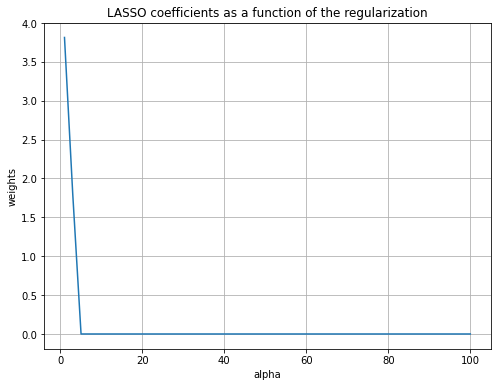

In [17]:
# Show LASSO paths   
plt.figure(2, figsize=(8,6))    
plt.plot(lasso_alphas, lasso_coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.grid()
plt.show()

In [18]:
# LASSO regression for different alpha values
alphas = [0.01, 0.1, 10, 15, 25, 30, 45]
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=True, max_iter=10000)
    lasso.fit(X_new, y)

    print('LASSO coefficients for alpha =', a)
    print(lasso.coef_)
    print()

LASSO coefficients for alpha = 0.01
[4.80394147]

LASSO coefficients for alpha = 0.1
[4.71394147]

LASSO coefficients for alpha = 10
[0.]

LASSO coefficients for alpha = 15
[0.]

LASSO coefficients for alpha = 25
[0.]

LASSO coefficients for alpha = 30
[0.]

LASSO coefficients for alpha = 45
[0.]



# Choosing best alpha for LASSO 
(Model Selection with K-Fold Cross Validation)

In [19]:
xArray.shape

(1000, 10)

In [20]:
from sklearn.linear_model import LassoCV

# use 10 fold cross-validation to find best alpha
n_alphas = 100
lasso_alphas = np.linspace(0.5, 40, n_alphas)

X_new = StandardScaler().fit_transform(xArray)

foldCount = 10
lassocv = LassoCV(cv=foldCount, alphas=lasso_alphas, fit_intercept=False, max_iter=10000, random_state=0)
lassocv.fit(X_new, y)

# show best result
print('Best alpha = ', lassocv.alpha_)
print()

print('Best coefficients = ', lassocv.coef_)  # we should choose X**2 and sign(x) features
print()

print('Best R^2 score = ', lassocv.score(X_new, y))
print()

Best alpha =  0.5

Best coefficients =  [ 0.          0.         -6.40249545  0.         -0.         -0.
  9.12007513  0.          0.         -0.        ]

Best R^2 score =  0.8427747986779416



In [21]:
coef = lassocv.coef_[[2,6]]
coef = coef[:,np.newaxis]

X_reduced = xArray[:,[2,6]]
y_pred = X_reduced.dot(coef)